In [203]:
import ee
import folium
import geehydro
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
ee.Authenticate()
ee.Initialize()


Successfully saved authorization token.


In [230]:
def air_info_collection(lat, lng, date_start, date_stop):

    """
    Obtain NO2 values for square around given location starting
    at the beginning of 2019 and reachingto the end of 2021.

    :param lat: Latitude of the location
    :param lng: Longitude of the location

    :return array: sum of pixel values in the square, that are
                   inside the time frame.
    """

    square = ee.Geometry.BBox(lng-0.15, lat-0.1, lng+0.15, lat+0.1)
    
    dataset = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_NO2"
    ).select("tropospheric_NO2_column_number_density"
    ).filterDate(str(date_start)+"-01", str(date_stop)+"-01").filterBounds(square)

    def setProperty(image):
        dict = image.reduceRegion(ee.Reducer.sum(), square)
        return image.set(dict)

    pixel_values = dataset.map(setProperty)
    aggregate_pixel_values = (pixel_values.aggregate_array("tropospheric_NO2_column_number_density"
    ).getInfo())
    mean_pixel_value = np.mean(aggregate_pixel_values)

    return mean_pixel_value

In [278]:
lat = 51.266389
lng = 19.330556
#lat = 23.9789
#lng = 82.6268
#lat = 49.514014
#lng = 8.421459
#lat = 51.484545
#lng = 6.713741

date_list = ["2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08",
"2019-09", "2019-10", "2019-11", "2019-12", "2020-01", "2020-02", "2020-03", "2020-04", "2020-05",
"2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12", "2021-01", "2021-02",
"2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11",
"2021-12", "2022-01"]

jdate_list = ["2019-01", "2020-01", "2021-01", "2022-01"]

ddate_list = ["2018-07", "2019-01", "2019-07", "2020-01",
"2020-07", "2021-01", "2021-07", "2022-01", "2022-07"]

date_list = ["2018-07", "2019-01", "2019-07", "2020-01",
"2020-07", "2021-01", "2021-07", "2022-01", "2022-07"]

res_list = []
i = 1

while i < len(date_list) - 1:
    result = air_info_collection(lat=lat, lng=lng, date_start=date_list[i], date_stop=date_list[i+1])
    res_list.append(result)
    i+=2

In [161]:
print(len(res_list))

36


(0.0, 0.03)

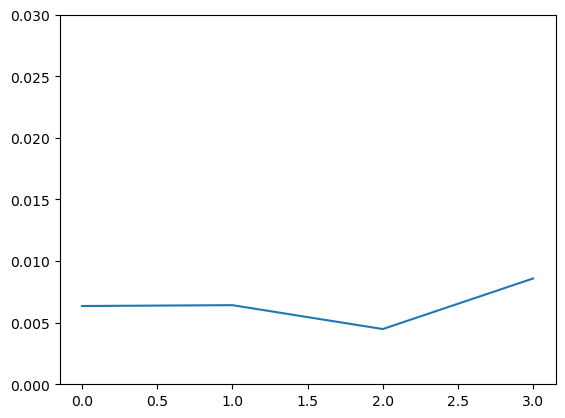

In [279]:
plt.plot(res_list)
ax = plt.gca()
ax.set_ylim([0.0, 0.03])

(0.0075, 0.016)

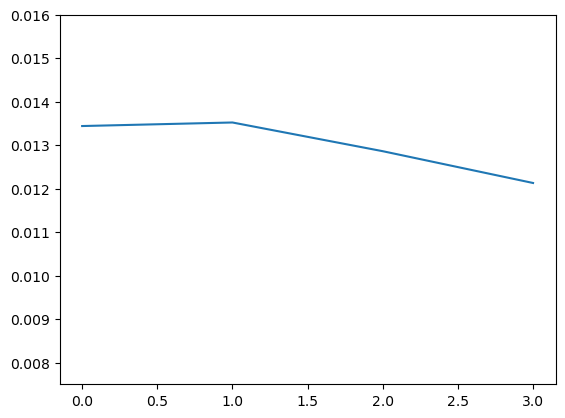

In [275]:
plt.plot(res_list)
ax = plt.gca()
ax.set_ylim([0.0075, 0.016])

In [237]:
lat = 49.514014
lng = 8.421459

coords = [lat, lng]
Map = folium.Map(location=coords, zoom_start=10)

square = ee.Geometry.BBox(lng-0.15, lat-0.1, lng+0.15, lat+0.1)

outer_square = ee.Geometry.BBox(lng-0.15*math.sqrt(2), lat-0.1*math.sqrt(2), lng+0.15*math.sqrt(2), lat+0.1*math.sqrt(2))


dataset = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_NO2")
dataset = dataset.select('tropospheric_NO2_column_number_density')

date_filter = ee.Filter.date('2019-11-01', '2021-12-01')
dataset = dataset.filter(date_filter)

dataset = dataset.sum().clip(square)

visualisation_params = {
  "min": 0.01,
  "max": 0.07,
  "palette": ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

Map.addLayer(square)
Map.addLayer(outer_square)
Map.addLayer(dataset, visualisation_params)

folium.Marker(
    location=[lat, lng],
    popup="Coal Power Plant",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(Map)

Map

In [271]:
lat = 51.484545
lng = 6.713741

#lat = 49.514014
#lng = 8.421459

coords = [lat, lng]
Map = folium.Map(location=coords, zoom_start=10)

square = ee.Geometry.BBox(lng-0.15, lat-0.1, lng+0.15, lat+0.1)

outer_square = ee.Geometry.BBox(lng-0.15*math.sqrt(2), lat-0.1*math.sqrt(2), lng+0.15*math.sqrt(2), lat+0.1*math.sqrt(2))


dataset = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_NO2")
dataset = dataset.select('tropospheric_NO2_column_number_density')

date_filter = ee.Filter.date('2019-11-01', '2021-12-01')
dataset = dataset.filter(date_filter)

dataset = dataset.sum().clip(outer_square)

visualisation_params = {
  "min": 0.02,
  "max": 0.06,
  "palette": ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

Map.addLayer(square)
Map.addLayer(outer_square)
Map.addLayer(dataset, visualisation_params)

folium.Marker(
    location=[lat, lng],
    popup="Coal Power Plant",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(Map)

Map

In [280]:
lat = 51.633292
lng = 7.342329

coords = [lat, lng]
Map = folium.Map(location=coords, zoom_start=10)

square = ee.Geometry.BBox(lng-0.15, lat-0.1, lng+0.15, lat+0.1)

outer_square = ee.Geometry.BBox(lng-0.15*math.sqrt(2), lat-0.1*math.sqrt(2), lng+0.15*math.sqrt(2), lat+0.1*math.sqrt(2))


dataset = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_NO2")
dataset = dataset.select('tropospheric_NO2_column_number_density')

date_filter = ee.Filter.date('2019-11-01', '2021-12-01')
dataset = dataset.filter(date_filter)

dataset = dataset.sum().clip(outer_square)

visualisation_params = {
  "min": 0.02,
  "max": 0.06,
  "palette": ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

Map.addLayer(square)
Map.addLayer(outer_square)
Map.addLayer(dataset, visualisation_params)

folium.Marker(
    location=[lat, lng],
    popup="Coal Power Plant",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(Map)

Map